In [32]:

from google.colab import files


uploaded = files.upload()



Saving salary - salary.csv to salary - salary (1).csv


Epoch 1/300
105/105 [==============================] - 2s 7ms/step - loss: 0.6851 - accuracy: 0.5787 - val_loss: 0.6606 - val_accuracy: 0.7628
Epoch 2/300
105/105 [==============================] - 1s 5ms/step - loss: 0.6278 - accuracy: 0.7051 - val_loss: 0.5601 - val_accuracy: 0.7574
Epoch 3/300
105/105 [==============================] - 1s 5ms/step - loss: 0.5297 - accuracy: 0.7363 - val_loss: 0.4282 - val_accuracy: 0.7852
Epoch 4/300
105/105 [==============================] - 1s 5ms/step - loss: 0.4543 - accuracy: 0.7731 - val_loss: 0.3688 - val_accuracy: 0.8326
Epoch 5/300
105/105 [==============================] - 1s 5ms/step - loss: 0.4201 - accuracy: 0.7974 - val_loss: 0.3481 - val_accuracy: 0.8353
Epoch 6/300
105/105 [==============================] - 1s 5ms/step - loss: 0.3999 - accuracy: 0.8170 - val_loss: 0.3383 - val_accuracy: 0.8393
Epoch 7/300
105/105 [==============================] - 1s 5ms/step - loss: 0.3877 - accuracy: 0.8238 - val_loss: 0.3320 - val_accuracy: 0.8432

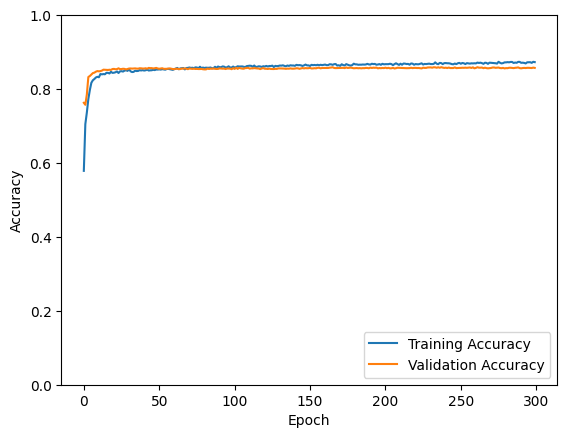

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Load your dataset (example loading from a CSV file)
# Replace with your actual data loading method
data = pd.read_csv("salary - salary.csv")


# Drop rows with missing values
data.dropna(inplace=True)

X = data.drop('salary', axis=1)
y = data['salary']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

column_transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

X = column_transformer.fit_transform(X)

X = X.toarray()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=200, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
